In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:

dataset = pd.read_csv('loan_prediction.csv')
df=dataset.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
for dataset in df:
    #Filter categorical variables
    categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of Categories for variable Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# changing yes to 1 and no to 0
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['Loan_Status'] = labelEncoder.fit_transform(df['Loan_Status'])
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

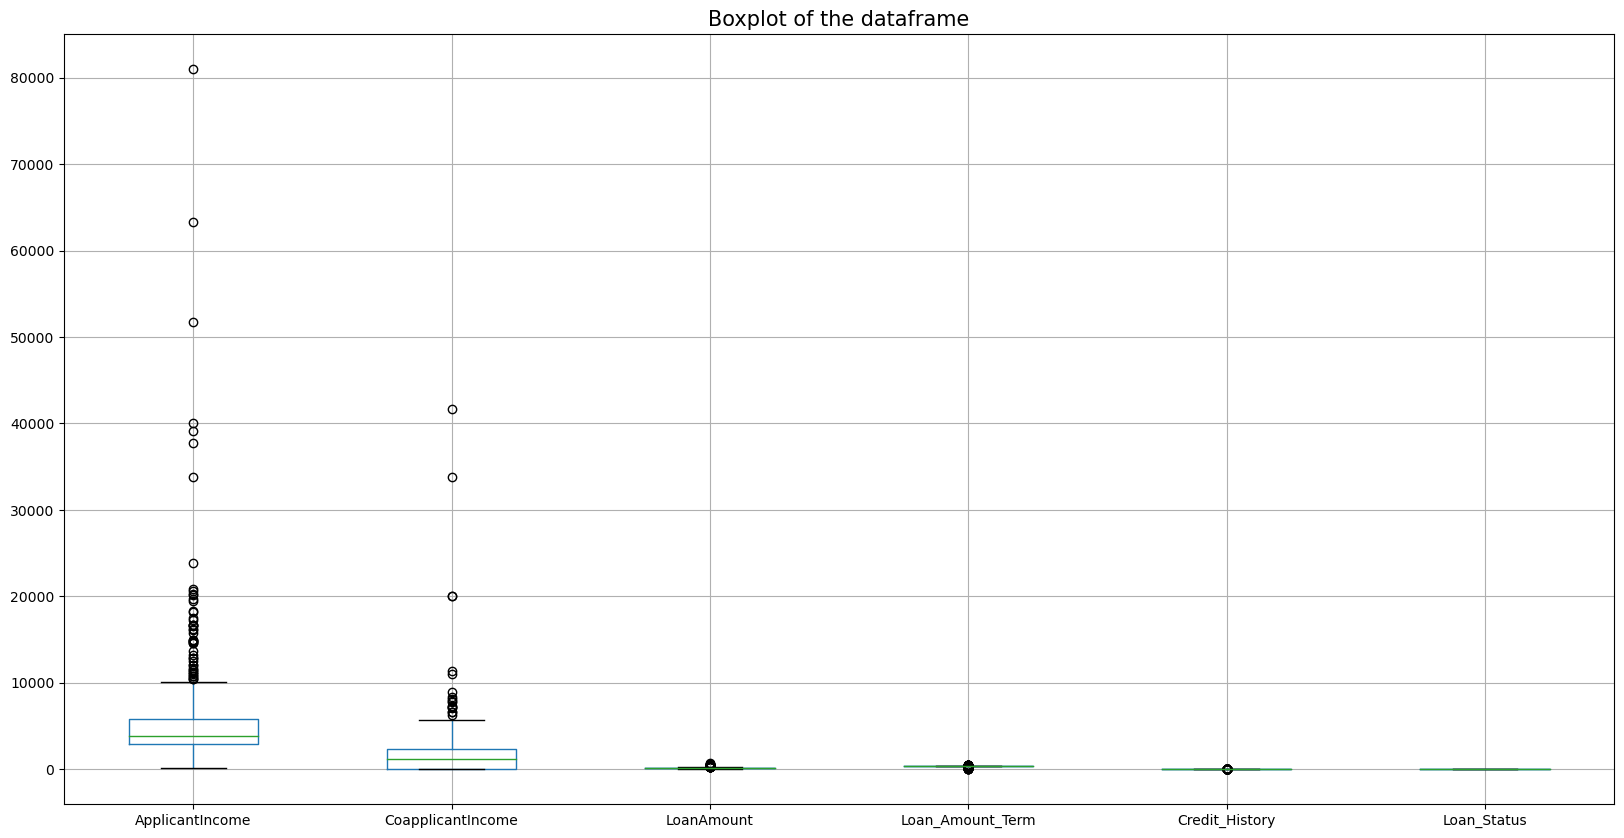

In [11]:
# checking for outliers in dataset
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

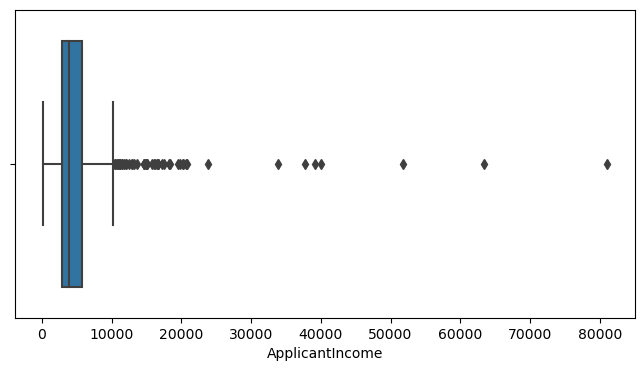

In [12]:
# looking inside duration variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

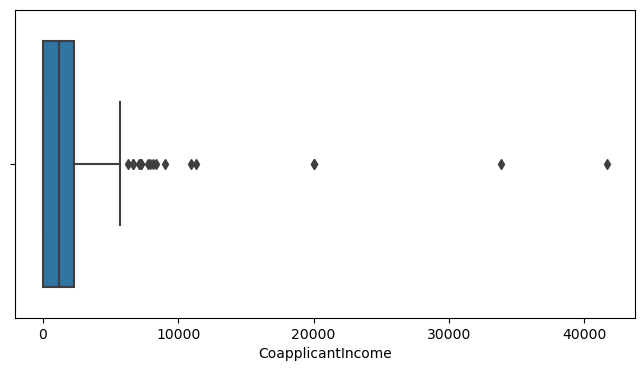

In [13]:
# looking inside duration variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

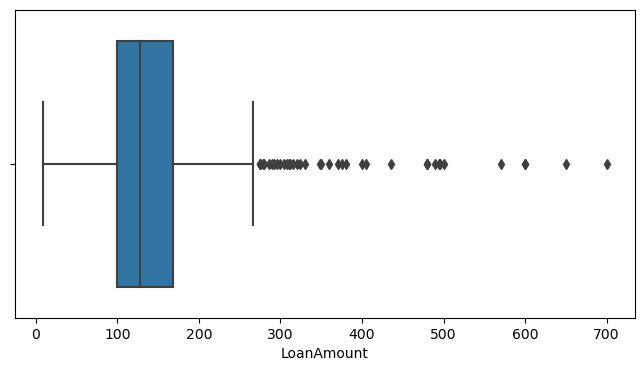

In [14]:
# looking inside duration variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [15]:
Q1_d = df['ApplicantIncome'].quantile(.25)
Q3_d = df['ApplicantIncome'].quantile(.75)
Q1_a = df['CoapplicantIncome'].quantile(.25)
Q3_a = df['CoapplicantIncome'].quantile(.75)
Q1_c = df['LoanAmount'].quantile(.25)
Q3_c = df['LoanAmount'].quantile(.75)

In [16]:
IQR_d = Q3_d - Q1_d
IQR_a = Q3_a - Q1_a
IQR_c = Q3_c - Q1_c
print(IQR_d)
print(IQR_a)
print(IQR_c)

2917.5
2297.25
68.0


In [17]:
lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d
lower_a = Q1_a - 1.5 * IQR_a
upper_a = Q3_a + 1.5 * IQR_a
lower_c = Q1_c - 1.5 * IQR_d
upper_c = Q3_c + 1.5 * IQR_d
print(lower_d,upper_d)
print(lower_a,upper_a)
print(lower_c,upper_c)

-1498.75 10171.25
-3445.875 5743.125
-4276.25 4544.25


In [18]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['ApplicantIncome'] >= lower_d] 
df_out= df[df['ApplicantIncome'] <= upper_d] 
df_out = df[df['CoapplicantIncome'] >= lower_a] 
df_out= df[df['CoapplicantIncome'] <= upper_a] 
df_out = df[df['LoanAmount'] >= lower_c] 
df_out= df[df['LoanAmount'] <= upper_c] 

In [19]:
# Calculating correlation
corr_matrix = df.corr()
print(corr_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000  


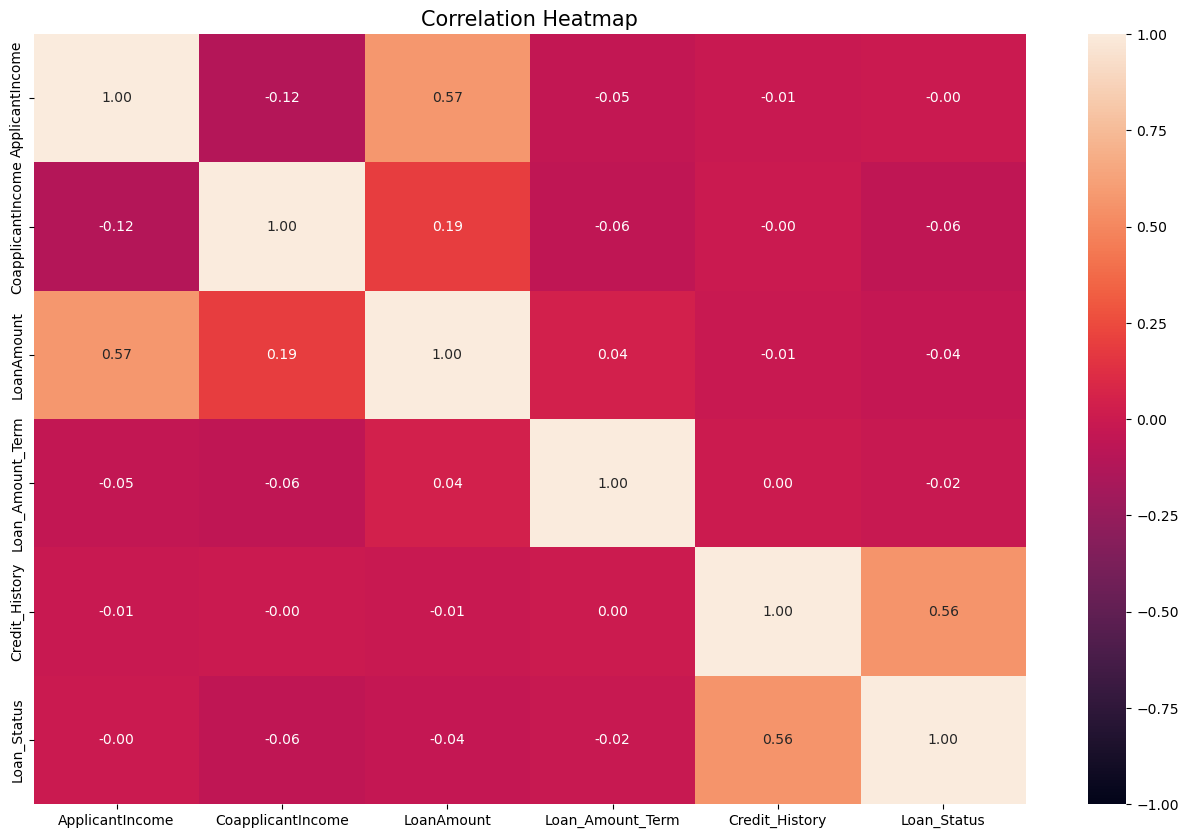

In [20]:
# Creating correlation heat map.
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

In [21]:
pd.crosstab(df.Gender, df.Loan_Status, margins = True)

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [22]:
df.Gender = df.Gender.fillna(df.Gender.mode())

sex = pd.get_dummies(df['Gender'] , drop_first = True )
df.drop(['Gender'], axis = 1 , inplace =True)
df = pd.concat([df , sex ] , axis = 1)





Plotting No. of Dependants (Size of family) in each household¶


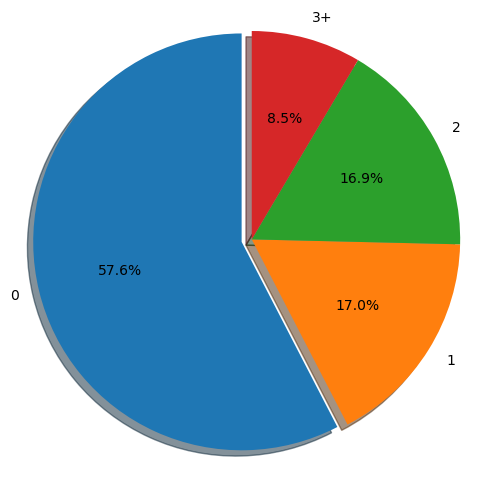

In [23]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [24]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Approval of loans between different sizes of families¶


In [25]:
pd.crosstab(df.Dependents , df.Loan_Status, margins = True)



    #The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.



Loan_Status,0,1,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599



Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)¶


In [26]:
df.Dependents = df.Dependents.fillna("0")
rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

df.Dependents = df.Dependents.replace(rpl).astype(int)


Approval of loans people those who have Credit History and those who don't¶


In [27]:
pd.crosstab(df.Credit_History , df.Loan_Status, margins = True)

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564



Filling up NAN values of Credit history by taking the mode

In [28]:
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mode()[0])


Plotting No. of people who are Self-employed vs who aren't¶


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

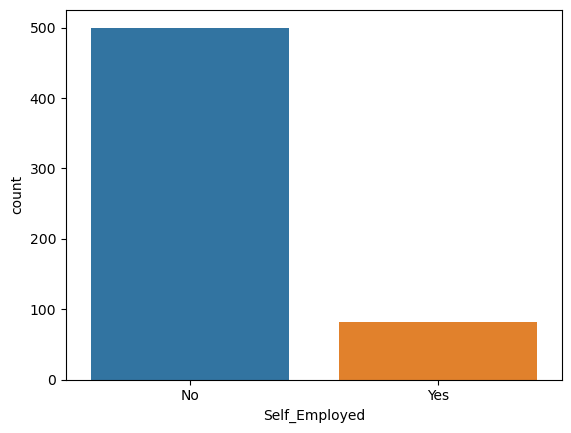

In [29]:
sns.countplot(df['Self_Employed'])

In [30]:
pd.crosstab(df.Self_Employed , df.Loan_Status,margins = True)

Loan_Status,0,1,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582



Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)¶


In [31]:
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode())
self_Employed = pd.get_dummies(df['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
df.drop(['Self_Employed'], axis = 1 , inplace =True)
df = pd.concat([df , self_Employed ] , axis = 1)


Plotting No. of Married people vs Unmarried people¶


<AxesSubplot:xlabel='Married', ylabel='count'>

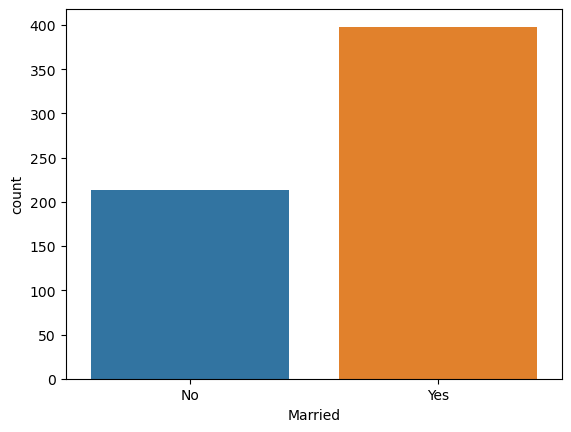

In [32]:
sns.countplot(df.Married)

In [33]:
pd.crosstab(df.Married , df.Loan_Status,margins = True)

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [34]:
df.Married = df.Married.fillna(df.Married.mode())
married = pd.get_dummies(df['Married'] , prefix = 'married',drop_first = True )
df.drop(['Married'], axis = 1 , inplace =True)
df = pd.concat([df , married ] , axis = 1)


Filling up NAN values of Loan Amount Term¶


In [35]:


df.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean()).astype(int)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

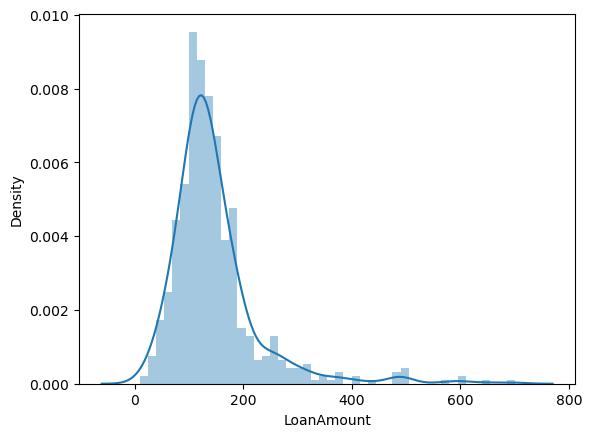

In [36]:
sns.distplot(df['LoanAmount'])


Plotting Graduates vs Non-Graduates¶


<AxesSubplot:xlabel='Education', ylabel='count'>

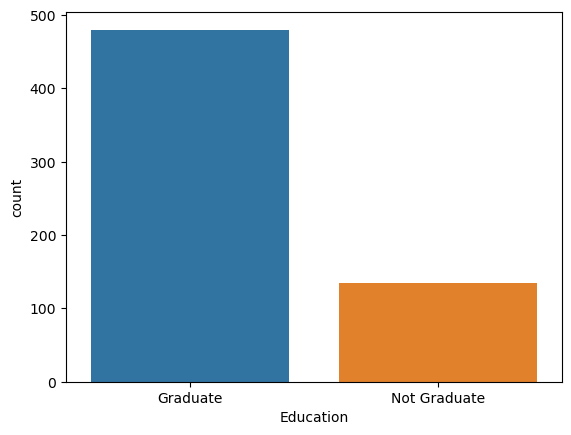

In [37]:
sns.countplot(df.Education)


Converting categorial variables to numerical variables¶


In [38]:
df['Education'] = df['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

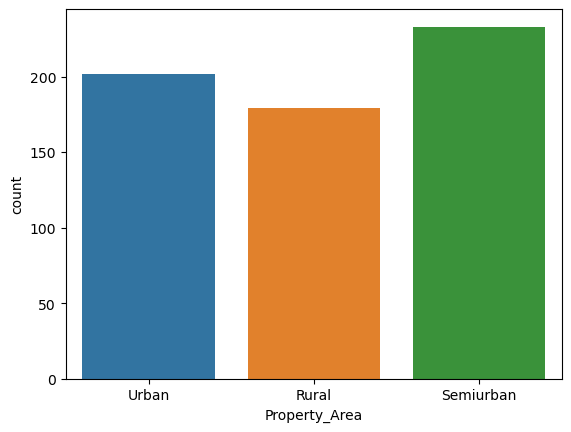

In [39]:
sns.countplot(df.Property_Area)


Converting categorial variables to numerical variables¶


In [40]:
df['Property_Area'] = df['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

df.Property_Area = df.Property_Area.fillna(df.Property_Area.mode())


Plotting Co-Applicant income and Applicant income¶


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

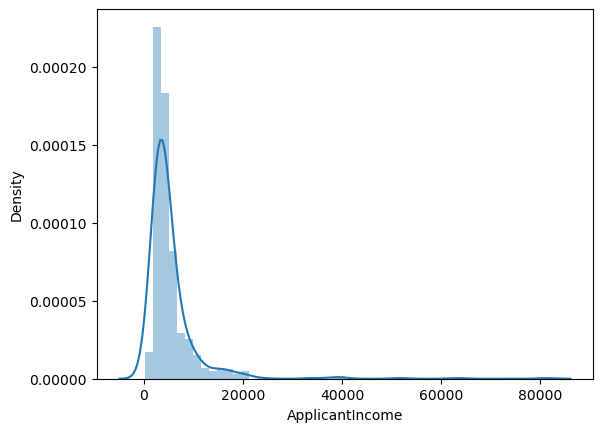

In [41]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

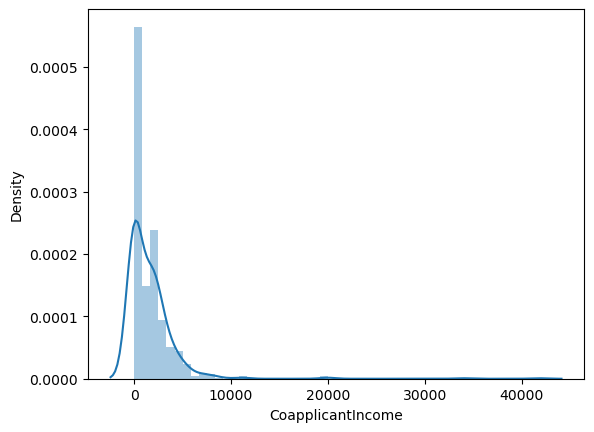

In [42]:
sns.distplot(df['CoapplicantIncome'])


Dropping the ID column¶


In [43]:
df.drop(['Loan_ID'], axis = 1 , inplace =True)

In [44]:
df.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,146,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,0,1
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,0,1
4,0,0,6000,0.0,141,1.0,0,1,1,0,0


<AxesSubplot:>

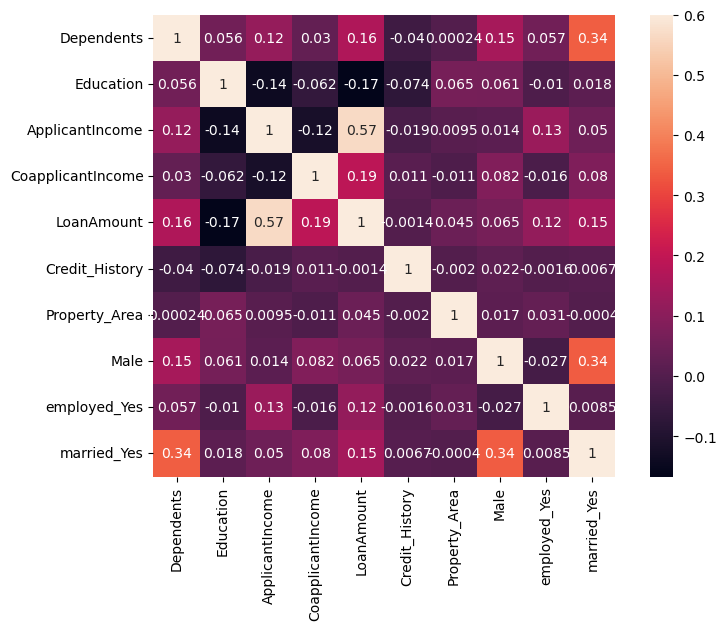

In [45]:
plt.figure(figsize=(9,6))
sns.heatmap(df.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True)

MODELLING

In [80]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [47]:


X = df.drop('Loan_Status' , axis = 1 )
y = df['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102,stratify = y)



In [48]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Voting

In [49]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [50]:
print(model1.__class__.__name__ , accuracy_score(y_test, model1_pred))
print(model2.__class__.__name__ , accuracy_score(y_test, model2_pred))
print(model3.__class__.__name__ , accuracy_score(y_test, model3_pred))

LogisticRegression 0.8162162162162162
DecisionTreeClassifier 0.7189189189189189
SVC 0.8054054054054054


### Hard

In [51]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ] 
voting_hard = VotingClassifier(estimators, voting="hard")

In [52]:
voting_hard.fit(X_train, y_train)
voting_hard_pred = voting_hard.predict(X_test)
accuracy_score(y_test, voting_hard_pred)*100

80.54054054054053

### Soft

In [53]:
model4 = SVC(probability=True) 
estimators = [('lr', model1), ('dt', model2) , ('svm', model4) ] 
voting_soft = VotingClassifier(estimators, voting="soft")

In [54]:
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [55]:
voting_soft_pred = voting_soft.predict(X_test)

In [56]:
accuracy_score(y_test, voting_soft_pred)*100

78.37837837837837

## Voting Regressor

In [57]:
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()

In [58]:
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()

In [59]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
print(r2_score(y_test, model1_pred))
print(r2_score(y_test, model2_pred))
print(r2_score(y_test, model3_pred))

0.3013726521861714
0.22563506160160496
-0.40646212326907394


## Apply Voting Regressor

In [62]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators)

In [63]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())])

In [64]:
voting_reg_pred = voting_reg.predict(X_test)

In [65]:
print(r2_score(y_test, voting_reg_pred))

0.20838157633750942


## Apply Weights [0.3, 0.1, 0.6] and Again Apply Voting Regressor

In [66]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators, weights=[0.3, 0.1, 0.6])

In [67]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())],
                weights=[0.3, 0.1, 0.6])

In [68]:
voting_reg_pred = voting_reg.predict(X_test)

In [69]:
print(r2_score(y_test, voting_reg_pred))

0.005491671638306106


## Bagging Classifier

In [70]:
df.shape

(614, 11)

In [71]:
svm = SVC(probability=True)

In [72]:
bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 0.5,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [73]:
X_train.shape

(429, 10)

In [74]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(probability=True), bootstrap_features=True,
                  max_features=0.5, max_samples=0.4, n_jobs=-1,
                  random_state=123)

In [75]:
bag_pred = bag.predict(X_test)

In [76]:
accuracy_score(y_test, bag_pred)*100

68.64864864864865

## Gradient Boosting Classifier

In [77]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

80.0

## XGBoost Classifier

In [81]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [82]:
xgbt.fit(X_train, y_train)

[01:29:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimarors" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimarors=10, n_estimators=100,
              n_jobs=0, num_class=2, num_parallel_tree=1, ...)

In [83]:
xgbt_pred = xgbt.predict(X_test)

In [85]:
accuracy_score(y_test, xgbt_pred)*100

77.29729729729729

In [89]:
xgbt.score(X_train, y_train)*100

86.94638694638695

In [88]:
xgbt.score(X_test, y_test)*100

77.29729729729729

# CatBoost

In [90]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_test)

0:	learn: 0.3943231	total: 146ms	remaining: 146ms
1:	learn: 0.3858616	total: 147ms	remaining: 0us


In [92]:
model.score(X_train, y_train)*100

30.68121889575981

In [93]:
model.score(X_test, y_test)*100

32.09708153985494